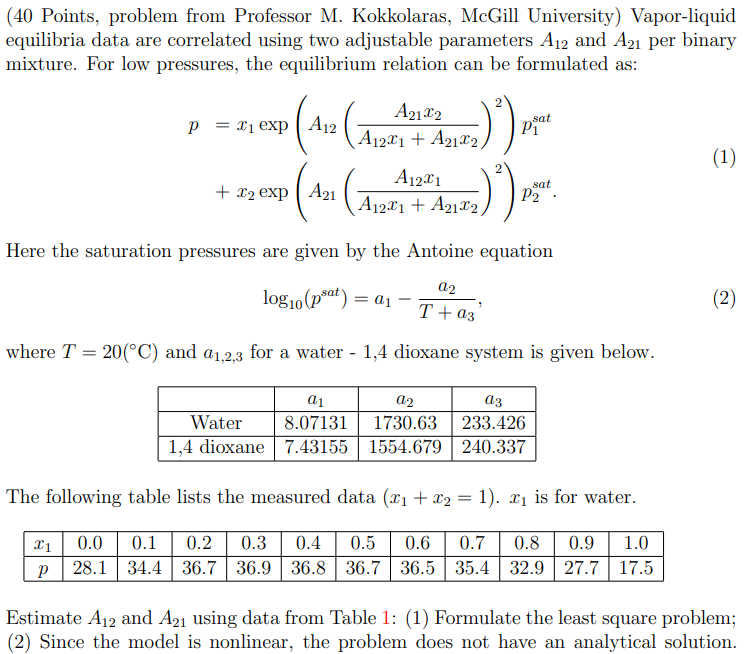

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [2]:
global x1,x2, T, p1_sat, p2_sat, p_data
x1 = np.arange(0, 1.1, 0.1)
x2 = 1-x1
x1 = torch.tensor(x1, requires_grad=False)
x2 = torch.tensor(x2, requires_grad=False)

T = 20 # Temprature

a = np.array([[8.07131, 1730.63, 233.426],
              [7.43155, 1554.679, 240.337]])
p1_sat = 10 ** (a[0, 0] - (a[0, 1] / (T + a[0, 2])))   #By Antoine equation
p2_sat = 10 ** (a[1, 0] - (a[1, 1] / (T + a[1, 2]))) #By Antoine equation

measured_pressure_data = np.array([[28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5]])
measured_pressure_data = torch.tensor(measured_pressure_data, requires_grad=False)

In [3]:
A = Variable(torch.tensor([1.0, 1.0]), requires_grad=True) # Initial A12 and A21 values

In [10]:
# Define functons
pressure = lambda A : x1 * torch.exp(A[0] * (A[1] * x2 / (A[0] * x1 + A[1] * x2)) ** 2) * p1_sat + \
                      x2 * torch.exp(A[1] * (A[0] * x1 / (A[0] * x1 + A[1] * x2)) ** 2) * p2_sat

def obj_fun(pressure, measured_pressure_data):
      # objective function 
    return ((pressure - measured_pressure_data) ** 2).sum()

In [5]:
error = obj_fun(pressure(A), measured_pressure_data)
error.backward()

In [8]:
def linesearch(Initial_point, grad):
    alpha = 1
    t = 0.3
    def pi(alpha, grad):
      return obj_fun(pressure(Initial_point), measured_pressure_data) - alpha * t * torch.matmul(torch.transpose(grad, -1, 0),grad)
    while pi(alpha, grad) < obj_fun(pressure(Initial_point - alpha* grad),measured_pressure_data):
      alpha = 0.5 * alpha
    return alpha

In [9]:
linesearch(A,A.grad)

0.001953125